In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import gseapy as gp

import cptac
import cptac.utils as u

In [2]:
def format_pval_annotation(pval_symbol, x1, x2, line_start = .05, line_height=.05):
    # for manual adjustment to pval annotations
    
    y, h = line_start, line_height
    plt.plot([x1, x1, x2, x2], #draw horizontal line
             [y, y+h, y+h, y], #vertical line
             lw=1.5, color= '.3')
    plt.text((x1+x2)*.5, # half between x coord
             y+h, pval_symbol, horizontalalignment='center', verticalalignment='bottom', color = "black")


In [3]:
def get_dataframe(test_gene_in, cancer_object, normal = False):
    p = cancer_object.join_omics_to_mutations(
        mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = test_gene_in) 
    
    if normal == False:
        p['binary_mutations'] = np.where(
                p[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')
        tumors = p[p.Sample_Status == 'Tumor'] #drop Normal samples
        columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
        mut_status = tumors.drop(columns_to_drop, axis = 1)
        #mut_status = mut_status.dropna(axis=1,how='all')
    else:
        p['binary_mutations'] = 'Mutated'
        p.loc[p['PTEN_Mutation_Status'] == 'Wildtype_Normal', 'binary_mutations'] = 'Normal'
        p.loc[p['PTEN_Mutation_Status'] == 'Wildtype_Tumor', 'binary_mutations'] = 'Wildtype'
        columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
        mut_status = p.drop(columns_to_drop, axis = 1)
        mut_status = mut_status.dropna(axis=1,how='all')
        
    return mut_status

In [4]:
gbm = cptac.Gbm()
en = cptac.Endometrial()

In [5]:
gene = 'PTEN'
test_gene = 'PTEN'

Gbm

In [6]:
gbm_prot = get_dataframe(test_gene, gbm) #normal=True)
gbm_prot

Name,PTEN_proteomics,binary_mutations
Sample_ID,,
S001,-0.431991,Mutated
S002,-0.265044,Wildtype
S003,0.390190,Mutated
S004,-0.915526,Mutated
S005,0.680291,Wildtype
...,...,...
S100,-0.725120,Mutated
S101,-0.242603,Wildtype
S102,0.428594,Wildtype


In [7]:
gbm_col_list = list(gbm_prot.columns)
gbm_col_list.remove('binary_mutations')

print("Doing t-test comparisons for GBM\n")
wrap_results = u.wrap_ttest(gbm_prot, 'binary_mutations', gbm_col_list, return_all=True)
wrap_results

Doing t-test comparisons for GBM

1 significant comparisons!


,Comparison,P_Value
0,PTEN_proteomics,0.000032


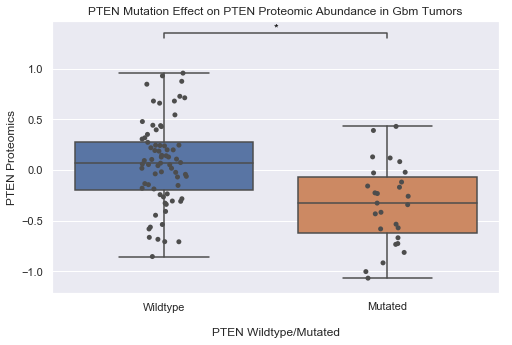

In [13]:
plt.rcParams['figure.figsize']=(8,5) #size of plot
sns.set(font_scale = 1)

boxplot = sns.boxplot(x='binary_mutations', y=test_gene+"_proteomics", 
                         order = ['Wildtype', 'Mutated'], data = gbm_prot, showfliers = False)    
boxplot.set_title('PTEN Mutation Effect on '+test_gene+' Proteomic Abundance in Gbm Tumors')
boxplot = sns.stripplot(x='binary_mutations', y=test_gene+"_proteomics", data = gbm_prot, jitter = True, 
                           color = ".3", order = ['Wildtype', 'Mutated'], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Mutated", ylabel = test_gene+' Proteomics')

format_pval_annotation('*', 0, 1, 1.3)

plt.show()
plt.clf()
plt.close()

Endometrial

In [9]:
en_prot = get_dataframe(test_gene, en) #normal=True)
en_prot

Name,PTEN_proteomics,binary_mutations
Sample_ID,,
S001,-0.526,Mutated
S002,-0.830,Mutated
S003,-0.941,Mutated
S005,0.730,Mutated
S006,-0.379,Wildtype
...,...,...
S099,-1.910,Mutated
S100,-0.616,Wildtype
S101,-0.164,Wildtype


In [10]:
en_col_list = list(en_prot.columns)
en_col_list.remove('binary_mutations')

print("Doing t-test comparisons for En\n")
en_wrap_results = u.wrap_ttest(en_prot, 'binary_mutations', en_col_list, return_all=True)
en_wrap_results

Doing t-test comparisons for En

1 significant comparisons!


,Comparison,P_Value
0,PTEN_proteomics,0.018255


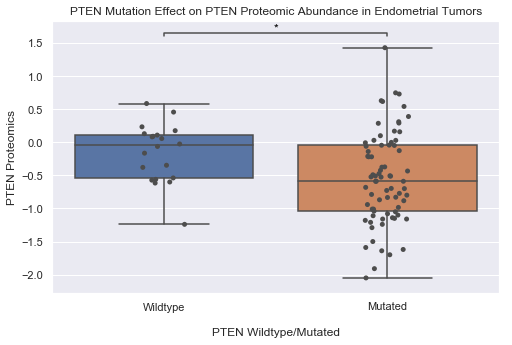

In [12]:
plt.rcParams['figure.figsize']=(8,5) #size of plot
sns.set(font_scale = 1)

boxplot = sns.boxplot(x='binary_mutations', y=test_gene+"_proteomics", 
                         order = ['Wildtype', 'Mutated'], data = en_prot, showfliers = False)    
boxplot.set_title('PTEN Mutation Effect on '+test_gene+' Proteomic Abundance in Endometrial Tumors')
boxplot = sns.stripplot(x='binary_mutations', y=test_gene+"_proteomics", data = en_prot, jitter = True, 
                           color = ".3", order = ['Wildtype', 'Mutated'], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Mutated", ylabel = test_gene+' Proteomics')

format_pval_annotation('*', 0, 1, 1.6)

plt.show()
plt.clf()
plt.close()

In [26]:
p = gbm.join_omics_to_mutations(
        mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = test_gene, 
        mutations_filter=['Frame_Shift_Del','Frame_Shift_Ins','Nonsense_Mutation', 'Nonstop_Mutation','Splice_Site',
                          'Missense_Mutation','In_Frame_Del','In_Frame_Ins'])
# only single mutations for PTEN - so this ordering just takes mutation out of list

p['PTEN_Mutation'].unique()
p

Name,PTEN_proteomics,PTEN_Mutation,PTEN_Location,PTEN_Mutation_Status,Sample_Status
Sample_ID,,,,,
S001,-0.431991,Missense_Mutation,p.G251D,Single_mutation,Tumor
S002,-0.265044,Wildtype_Tumor,No_mutation,Wildtype_Tumor,Tumor
S003,0.390190,Missense_Mutation,p.C136Y,Single_mutation,Tumor
S004,-0.915526,Missense_Mutation,p.R173H,Single_mutation,Tumor
S005,0.680291,Wildtype_Tumor,No_mutation,Wildtype_Tumor,Tumor
...,...,...,...,...,...
S111,1.064378,Wildtype_Normal,No_mutation,Wildtype_Normal,Normal
S112,1.269154,Wildtype_Normal,No_mutation,Wildtype_Normal,Normal
S113,1.419910,Wildtype_Normal,No_mutation,Wildtype_Normal,Normal


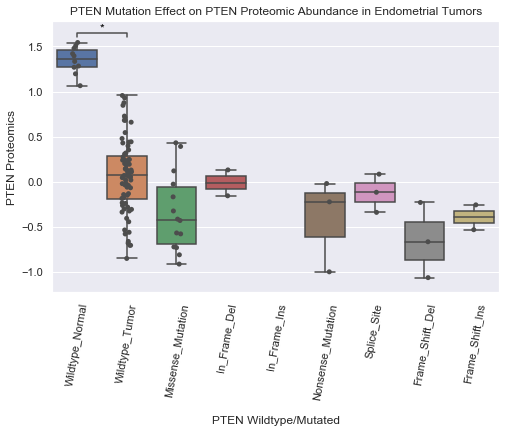

In [28]:
plt.rcParams['figure.figsize']=(8,5) #size of plot
sns.set(font_scale = 1)

order_in = ['Wildtype_Normal','Wildtype_Tumor','Missense_Mutation','In_Frame_Del','In_Frame_Ins','Nonsense_Mutation',
           'Splice_Site', 'Frame_Shift_Del', 'Frame_Shift_Ins']

boxplot = sns.boxplot(x='PTEN_Mutation', y=test_gene+"_proteomics", 
                         order = order_in, data = p, showfliers = False)    
boxplot.set_title('PTEN Mutation Effect on '+test_gene+' Proteomic Abundance in Gbm Tumors')
boxplot = sns.stripplot(x='PTEN_Mutation', y=test_gene+"_proteomics", data = p, jitter = True, 
                           color = ".3", order = order_in, dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Mutated", ylabel = test_gene+' Proteomics')

boxplot.set_xticklabels(boxplot.get_xticklabels(),rotation = 80)

format_pval_annotation('*', 0, 1, 1.6)

plt.show()
plt.clf()
plt.close()

In [67]:
gene_cnv = gbm.join_omics_to_mutations(
        mutations_genes = [gene], omics_df_name = 'CNV', omics_genes = test_gene)
gene_cnv.loc[gene_cnv['PTEN_CNV'] >= 0.2, 'Status'] = 'CNV_Amplification' #what is .2 considered?
gene_cnv.loc[gene_cnv['PTEN_CNV'] < 0.2, 'Status'] = 'CNV_Deletion'
#cnv = gene_cnv.rename(columns = {'PTEN_CNV':'PTEN'})
#don't combine because that double counts samples? concat doesn't work 'PTEN_Mutation' stays list type
# !!!! USE melt if need to combine
gene_cnv

0.19044152359721608

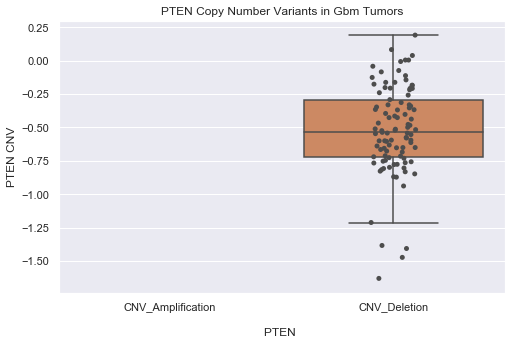

In [69]:
plt.rcParams['figure.figsize']=(8,5) #size of plot
sns.set(font_scale = 1)

order_in = ['CNV_Amplification','CNV_Deletion']

boxplot = sns.boxplot(x='Status', y=test_gene+"_CNV", 
                         order = order_in, data = gene_cnv, showfliers = False)    
boxplot.set_title(test_gene+' Copy Number Variants in Gbm Tumors')
boxplot = sns.stripplot(x='Status', y=test_gene+"_CNV", data = gene_cnv, jitter = True, 
                           color = ".3", order = order_in, dodge = True)
boxplot.set(xlabel = "\nPTEN ", ylabel = test_gene+' CNV')

#boxplot.set_xticklabels(boxplot.get_xticklabels(),rotation = 80)

#format_pval_annotation('*', 0, 1, 1.6)

plt.show()
plt.clf()
plt.close()

In [17]:
                                                                                           

missense_truncation_groups = {'In_Frame_Del': 'M', 'In_Frame_Ins': 'M',
            'Missense_Mutation': 'M', 'Frame_Shift_Del': 'T','Nonsense_Mutation': 'T', 
            'Splice_Site': 'T', 'Frame_Shift_Ins': 'T','Nonstop_Mutation':'T'}
    
mutations_replaced_M_T = origin_df.replace(missense_truncation_groups)

TypeError: unhashable type: 'list'